# Eigenface

In [1]:
from os.path import isfile, join, exists
from os import listdir
import numpy as np
from skimage.util import img_as_float # install scikit-image
from skimage import io
import matplotlib.pyplot as plt

mypathclass='Yalefaces'

In [3]:
onlyfilesclass = [f for f in listdir(mypathclass)  if isfile(join(mypathclass, f))]

Download the images

In [6]:
nfc=len(onlyfilesclass)
faces={}
for i in range(1,16):
    faces[i]=[]
for i in range(nfc):
    img=onlyfilesclass[i]
    imgSplit=img.split(".")
    subject=imgSplit[0]
    number = (subject[-2:])
    if len(number)==2:
      number = int((subject[-2:]))
      imgR = img_as_float(io.imread(join(mypathclass, img)))
      imgR =np.asarray(imgR)
      faces[number].append(imgR) 
  

Put  the images in a tensor, that is a matrix with three dimension. We divide the images in two set, the first one is called train set and is used to find the preliminary information, the second one is called test set and is used to test the algorithm

In [9]:
imgAT = []
imgTest =[]
for i in range(1,16):
    for j in range(7):
      imgAT.append(np.asarray(faces[i][j]))
    for j in range(7,11):
      imgTest.append(np.asarray(faces[i][j]))
    
imgAT = np.asarray(imgAT)
(nt,nr,nc)=imgAT.shape
print(nt,nr,nc)
imgTest = np.asarray(imgTest)
(nf,nr,nc)=imgTest.shape
print(nf,nr,nc)

105 243 320
60 243 320


In [11]:
# Compute a matrix containing all the train set images as his columns
imgA = imgAT.reshape(nt,nr*nc).T
imgTest = imgTest.reshape(nf,nr*nc).T

In [13]:
(nrc,nt)=imgA.shape
print(nrc,nt)

77760 105


compute the mean image and subtract it to all the images

(77760,)
(77760, 105)


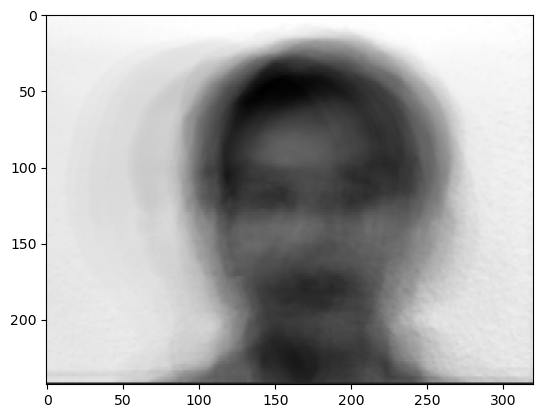

In [16]:
imgAsum = np.sum(imgA,axis=1)/nt
print(imgAsum.shape)
e = np.ones((1,nt))
#imgAM=imgA-np.dot(imgAsum.reshape(nrc,1),e)
imgAM=imgA-imgAsum.reshape(nrc,1)
print(imgA.shape)
plt.imshow(imgAsum.reshape(nr,nc),cmap='gray')

(15, 77760)
Explained variance [1718.03910361  751.80348064  480.97815039  336.12075493  265.43023186
  215.37437456  153.29647298  119.93730478  115.05027962   98.81059815
   73.15219646   59.29596148   53.91918222   49.46020418   48.50030307]
Singular Values [422.70091882 279.62038908 223.65537695 186.96673103 166.14675475
 149.66273736 126.26493254 111.6847335  109.38568956 101.37209777
  87.22286645  78.52884816  74.88387644  71.72071692  71.02134552]
Singular Values error 0.0005877689151049639
Explained variance error 0.0011751923579123935
(105, 15)
[[ 1.00000000e+00 -1.20888542e-16 -8.78203760e-17  1.16226473e-16]
 [-1.20888542e-16  1.00000000e+00 -1.04083409e-16 -1.77497448e-16]
 [-8.78203760e-17 -1.04083409e-16  1.00000000e+00 -4.35849273e-17]
 [ 1.16226473e-16 -1.77497448e-16 -4.35849273e-17  1.00000000e+00]]
77759
[[ 1.78676067e+05 -7.11619167e-10  1.83924555e-11 -3.73551097e-12]
 [-7.11619167e-10  7.81875620e+04  2.19672540e-11 -1.80580220e-12]
 [ 1.83924555e-11  2.19672540e

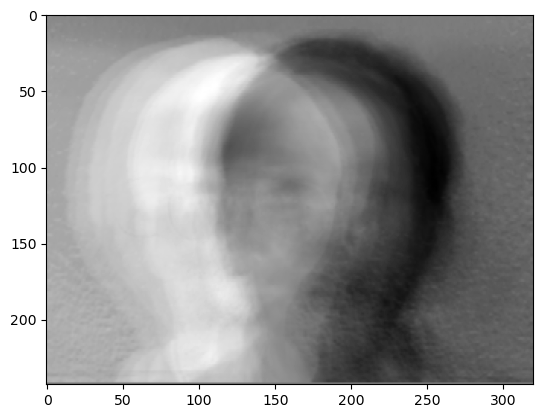

In [30]:
from sklearn.decomposition import PCA
import scipy.linalg as la
whiten=False
ncomp=15
pca = PCA(copy=True,n_components=ncomp,whiten=whiten, svd_solver='randomized').fit(imgAM.T)
IM_pcacomp=pca.components_  # U
print(IM_pcacomp.shape)
print('Explained variance', pca.explained_variance_)
print('Singular Values', pca.singular_values_)
# Controlliamo con la SVD
U, s, Vh = la.svd(imgAM.T,full_matrices=False)
print('Singular Values error',np.linalg.norm( (s[0:ncomp]-pca.singular_values_)/s[0:ncomp],np.inf))
print('Explained variance error', np.linalg.norm( (s[0:ncomp]**2/(nt-1)-pca.explained_variance_)/(s[0:ncomp]**2/(nt-1)),np.inf))
IM_pca = pca.transform(imgAM.T)  #   Vh
print(IM_pca.shape)
Ad = np.dot(IM_pcacomp,IM_pcacomp.T);
print(Ad[0:4,0:4])
print(nrc-1)
#IM_pca = IM_pca/pca.singular_values_ #To make sure that the columns are orthogonal
Ad = np.dot(IM_pca.T,IM_pca);
print(Ad[0:4,0:4])
plt.imshow(IM_pcacomp[0,:].reshape(nr,nc),cmap='gray')

In [20]:
pca.n_samples_

NameError: name 'pca' is not defined

In [35]:
pca.n_features_in_

77760

perform the PCA, for the moment we choose a fix number of components

we choose a test image

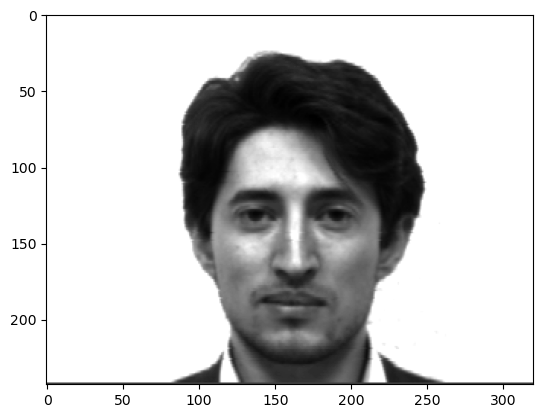

In [39]:
ng = 10
plt.imshow(imgTest[:,ng].reshape(nr,nc),cmap='gray')

In [41]:
# we compute the coordinates of the projection of the test image 
# onto the eigenface space
PT1=imgTest[:,ng]-imgAsum
#mPT1=np.mean(PT1)
#PT1=PT1-np.mean(PT1)

Ptest=np.dot( IM_pcacomp,PT1)
print(Ptest.shape)
IM_pca.shape

(15,)


(105, 15)

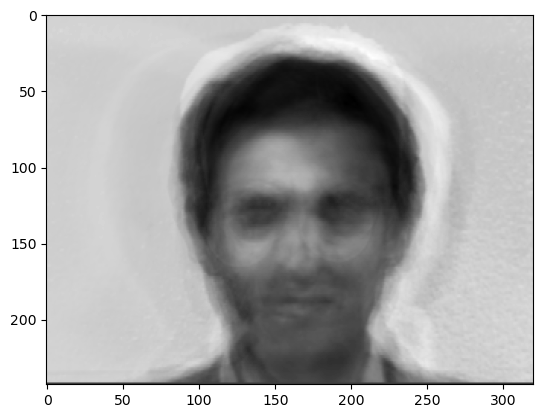

In [43]:
plt.imshow((np.dot(IM_pcacomp.T,Ptest)+imgAsum).reshape(nr,nc),cmap='gray')

In [47]:
# compute the class for each faces, that is the mean 
#  of the coordinates of the projection
Cli = {}
for i in range(1,16):
    Cli[i]=[]
inpca=0    
for i in range(1,16):
     for j in range(7):
       Cli[i].append(IM_pca[inpca,:])
       inpca=inpca+1;
     Cli[i]=np.asarray(Cli[i])
Cli[1].shape      

(7, 15)

In [49]:
om = {}
for i in range(1,16):
    om[i]=np.mean(Cli[i],axis=0)    

The simplest method for determine which face class provide the best description of the input is to find the face class that minimize the euclidean differences of the coordinates in the eigenface basis. We compute the norm for each class

In [52]:
v = np.zeros((15,1))
for i in range(1,16):
    v[i-1]= np.linalg.norm(om[i]-Ptest)

In [54]:
nclass=np.argmin(v)
print(nclass)

2


let us check the result

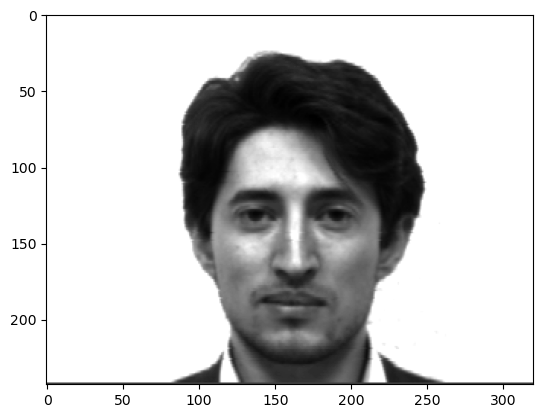

In [57]:
plt.imshow(imgTest[:,ng].reshape(nr,nc),cmap='gray')

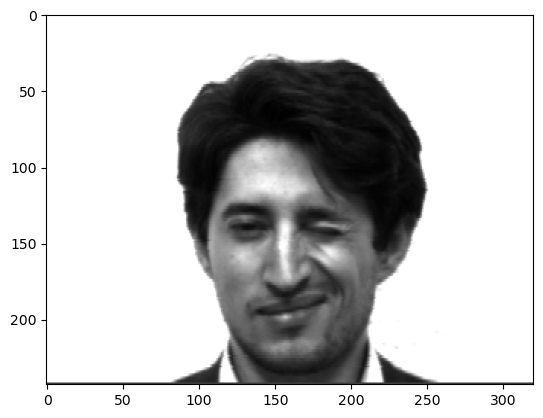

In [59]:
plt.imshow(np.asarray(faces[nclass+1][0]).reshape(nr,nc),cmap='gray')

Exercise 1: check and compare all the studied techniques to find the minimal value of k, number of principal component that are useful to classify the faces

Exercise 2: Classify all the faces in the testset and compute the confusion matrix. The element in position i,j of the confusion matrix  contains the number of observations known to be in group i and predicted to be in group j. Use  sklearn.metrics.confusion_matrix, and compute also the classification report using sklearn.metrics.classification_report